**Handwritten Numbers Detection**

In [88]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [89]:
# loading data
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [90]:
# shape of the data split
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [91]:
# values stored as a pixel in a rows --> total 28 rows
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [92]:
# output --> label value
print(Y_train)

[5 0 4 ... 5 6 8]


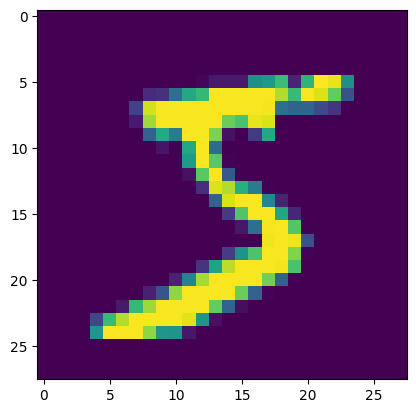

In [93]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [94]:
# initally the range of the pixels --> 0-255
# array should be in a range 0-1
# as when our values in the range then weights are corrected and computed fastly and conversion is easy
# max = 1
# min = 0

X_train = X_train/255
X_test = X_test/255

In [95]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [96]:
model = Sequential()
# 28X28 pixel value by flattening make them side-by-side --> convert in 1D from 2D
model.add(Flatten(input_shape=(28,28)))
# adding the dense layer to Sequential
model.add(Dense(128, activation='relu'))
# adding one more hidden layer
model.add(Dense(32, activation='relu'))
# whenever more than one node in output use the softmax for classification
model.add(Dense(10, activation='softmax'))  # output layer

784*128+128 = 100480

128*10+10 = 1290

In [98]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
# sparse_categorical_crossentropy --> NO NEED OF OneHotEncoding
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
# train the model
history = model.fit(X_train, Y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8527 - loss: 0.5059 - val_accuracy: 0.9562 - val_loss: 0.1466
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9645 - loss: 0.1203 - val_accuracy: 0.9637 - val_loss: 0.1228
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9758 - loss: 0.0801 - val_accuracy: 0.9697 - val_loss: 0.1015
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9817 - loss: 0.0611 - val_accuracy: 0.9707 - val_loss: 0.0993
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0427 - val_accuracy: 0.9736 - val_loss: 0.0963
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9898 - loss: 0.0338 - val_accuracy: 0.9743 - val_loss: 0.0918
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0304 - val_accuracy: 0.9720 - val_loss: 0.1059
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9925 - loss: 0.0235 -

In [101]:
# prediction
y_prod = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [102]:
print(y_prod)

[[2.58623633e-21 1.33090277e-16 1.35477308e-16 ... 9.99999940e-01
  2.08868351e-15 8.31397193e-14]
 [1.50375501e-25 8.02481026e-16 9.99999940e-01 ... 1.14976329e-24
  4.71839842e-12 7.97996062e-25]
 [8.75094810e-13 9.99960124e-01 1.88700078e-08 ... 2.60865363e-05
  1.35208356e-05 6.71196909e-12]
 ...
 [1.77047526e-28 9.18610672e-17 1.26205456e-25 ... 2.62661207e-14
  1.50086276e-15 2.38945264e-09]
 [1.80035130e-23 6.64133871e-24 1.10650214e-30 ... 1.42603269e-23
  9.59814537e-15 8.33479213e-28]
 [1.26486147e-22 1.21161636e-23 1.81461192e-21 ... 7.06048817e-21
  1.60506061e-19 2.98456945e-24]]


In [103]:
# max value at which axis
y_pred = y_prod.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [104]:
from sklearn.metrics import accuracy_score
print("Accuarcy :: ", accuracy_score(Y_test, y_pred))

Accuarcy ::  0.9734


For increasingthe accuarcy, we can add more layers or increase the number of nodes in the existing layers

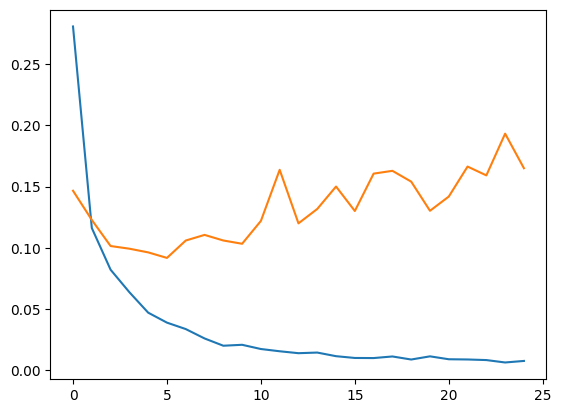

In [105]:
# eposh increase and training loss reduce
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

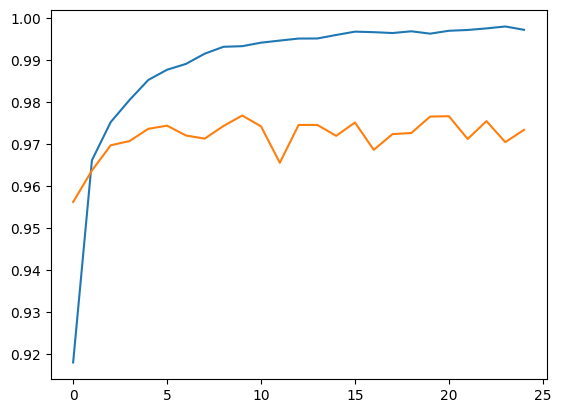

In [106]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

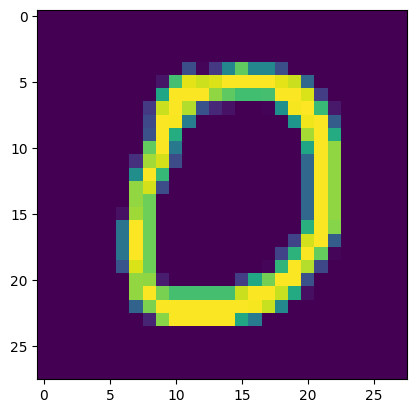

In [118]:
plt.imshow(X_test[10])

In [117]:
# prediction
model.predict(X_test[10].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([0])